# 6.4 Supervised Machine Learning - Regression

## Table of contents:
### 1.Importing Libraries
### 2. Importing Data
### 3. Data Cleaning
#### 3.1 Missing values and "0" values
#### 3.2 Checking extreme values
### 4. Defining the Hypothesis
### 5. Regression Analysis
#### 5.1 Reshaping variables into NumPy arrays
#### 5.2 Splitting Data
#### 5.3 Creating and fitting the regression object
#### 5.4 Testing predictions
#### 5.5 Summary Statistics
#### 5.6 Comparing actual values and predicted values
### 6. Improving the regression
#### 6.1 Removing Outliers
#### 6.2 Reshaping variables into NumPy arrays
#### 6.3 Splitting Data
#### 6.4 Creating and fitting the regression object
#### 6.5 Testing predictions
#### 6.6 Summary Statistics
#### 6.7 Comparing actual values and predicted values
### 7. Conclusions
### 8. Regression Analysis for the full dataframe (all years included)
#### 8.1 Importing the full Dataframe (all years included)
#### 8.2 Data Cleaning
##### 8.2.1 Missing values and "0" values
##### 8.2.2 Checking extreme values¶
#### 8.3 Scatterplot for the variables of interest
#### 8.4 Regression Analysis
##### 8.4.1 Reshaping variables into NumPy arrays
##### 8.4.2 Splitting Data
##### 8.4.3 Creating and fitting the regression object
##### 8.4.4 Testing predictions
##### 8.4.5 Summary statistics
##### 8.4.6 Comparing actual values and predicted values
### 9. Improving the Regression for the full dataframe (all years included)
#### 9.1 Removing Outliers
#### 9.2 Reshaping variables into NumPy arrays
#### 9.3 Splitting Data
#### 9.4 Creating and fitting the regression object
#### 9.5 Testing predictions
#### 9.6 Summary Statistics
#### 9.7 Comparing actual values and predicted values
### 10. Conclusions based on Regression Analysis for the full dataframe

# 1. Importing Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 2. Importing Data

In [3]:
# Create a path to the root directory for this project

path = r'C:\Users\osoty\Desktop\CareerFoundry Data Analytics\Data Immersion\Achievement 6\Global CO2 Emissions Analysis'

In [4]:
# Import the cleaned dataframe from script 6.3

df_co2 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_recent_only_countries_flags.pkl'))

In [5]:
# Print the first 20 rows

df_co2.head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,co2_category,co2_per_capita_category,average_co2_emission
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,...,0.004,0.040,0.009,0.015,0.000,0.005,0.057,Low,Low,10.2639
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,...,0.004,0.039,0.009,0.016,0.000,0.005,0.048,Low,Low,10.2639
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,...,0.005,0.038,0.009,0.016,0.000,0.004,0.044,Low,Low,10.2639
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,...,0.005,0.037,0.009,0.017,0.000,0.004,0.056,Low,Low,10.2639
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,...,0.005,0.036,0.009,0.018,0.000,0.005,0.048,Low,Low,10.2639
5,Afghanistan,2017,AFG,35643420.0,6.875280e+10,0.045,0.001,9.868,0.800,8.827,...,0.006,0.035,0.009,0.019,0.000,0.004,0.050,Low,Low,10.2639
6,Afghanistan,2018,AFG,36686788.0,6.759497e+10,0.057,0.002,10.818,0.950,9.628,...,0.006,0.035,0.008,0.019,0.000,0.004,0.054,Low,Low,10.2639
7,Afghanistan,2019,AFG,37769496.0,NaN,0.038,0.001,11.082,0.264,2.436,...,0.006,0.034,0.008,0.020,0.000,0.003,0.055,Low,Low,10.2639
8,Afghanistan,2020,AFG,38972236.0,NaN,0.061,0.002,11.682,0.600,5.416,...,0.007,0.033,0.008,0.021,0.000,0.003,0.065,Low,Low,10.2639
9,Afghanistan,2021,AFG,40099460.0,NaN,0.012,0.000,11.874,0.192,1.647,...,0.007,0.032,0.008,0.022,0.000,0.003,0.063,Low,Low,10.2639


#### In the last script, I removed some rows modifying the dataframe, but I forgot to reset the index.

In [6]:
# Reset the index

df_co2 = df_co2.reset_index(drop = True)

In [7]:
# Print the first 20 rows

df_co2.head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,co2_category,co2_per_capita_category,average_co2_emission
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,...,0.004,0.040,0.009,0.015,0.000,0.005,0.057,Low,Low,10.2639
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,...,0.004,0.039,0.009,0.016,0.000,0.005,0.048,Low,Low,10.2639
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,...,0.005,0.038,0.009,0.016,0.000,0.004,0.044,Low,Low,10.2639
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,...,0.005,0.037,0.009,0.017,0.000,0.004,0.056,Low,Low,10.2639
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,...,0.005,0.036,0.009,0.018,0.000,0.005,0.048,Low,Low,10.2639
5,Afghanistan,2017,AFG,35643420.0,6.875280e+10,0.045,0.001,9.868,0.800,8.827,...,0.006,0.035,0.009,0.019,0.000,0.004,0.050,Low,Low,10.2639
6,Afghanistan,2018,AFG,36686788.0,6.759497e+10,0.057,0.002,10.818,0.950,9.628,...,0.006,0.035,0.008,0.019,0.000,0.004,0.054,Low,Low,10.2639
7,Afghanistan,2019,AFG,37769496.0,NaN,0.038,0.001,11.082,0.264,2.436,...,0.006,0.034,0.008,0.020,0.000,0.003,0.055,Low,Low,10.2639
8,Afghanistan,2020,AFG,38972236.0,NaN,0.061,0.002,11.682,0.600,5.416,...,0.007,0.033,0.008,0.021,0.000,0.003,0.065,Low,Low,10.2639
9,Afghanistan,2021,AFG,40099460.0,NaN,0.012,0.000,11.874,0.192,1.647,...,0.007,0.032,0.008,0.022,0.000,0.003,0.063,Low,Low,10.2639


#### The index has been reset now.

In [8]:
# Check the size of the dataframe

df_co2.shape

(2200, 44)

In [9]:
# Export the dataframe (overwrite) so I don't have to reset the index in the next script

df_co2.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'emissions_clean_recent_only_countries_flags.pkl'))

# 3. Data Cleaning

#### Before running the regression, the data needs to be prepared by checking missing values and extreme values.

## 3.1 Missing values and "0" values

#### In the last script it already became evident that there are missing values. Let's check again:

In [10]:
# Check for missing values

df_co2.isnull().sum()

country                                   0
year                                      0
iso_code                                  0
population                                0
gdp                                    1052
cement_co2                               17
cement_co2_per_capita                    17
co2                                       0
co2_growth_abs                           10
co2_growth_prct                           0
co2_per_capita                            0
co2_per_gdp                            1045
coal_co2                                  0
coal_co2_per_capita                       0
cumulative_cement_co2                    17
cumulative_co2                            0
cumulative_coal_co2                       0
cumulative_flaring_co2                    0
cumulative_gas_co2                        0
cumulative_oil_co2                        0
energy_per_capita                       360
energy_per_gdp                         1052
flaring_co2                     

#### The variables I'm interested in are "primary_energy_consumption" and "co2". We have 0 missing values in the "co2" column, but we still have 360 missing values for "primary_energy_consumption". Therefore, we need to create a new dataframe that does not contain observations with NaNs.

In [11]:
# Create a new dataframe that doesn't contain missing values in the variable of interest

df_co2_new = df_co2[df_co2['primary_energy_consumption'].isnull() == False]

In [12]:
# Check the size of the new dataframe

df_co2_new.shape

(1840, 44)

#### The new dataframe has 360 observations less as expected. Let's check if the missing values are 0.

In [13]:
# Check for missing values

df_co2_new.isnull().sum()

country                                  0
year                                     0
iso_code                                 0
population                               0
gdp                                    692
cement_co2                              13
cement_co2_per_capita                   13
co2                                      0
co2_growth_abs                           0
co2_growth_prct                          0
co2_per_capita                           0
co2_per_gdp                            685
coal_co2                                 0
coal_co2_per_capita                      0
cumulative_cement_co2                   13
cumulative_co2                           0
cumulative_coal_co2                      0
cumulative_flaring_co2                   0
cumulative_gas_co2                       0
cumulative_oil_co2                       0
energy_per_capita                        0
energy_per_gdp                         692
flaring_co2                              0
flaring_co2

#### The missing values for primary energy consumption have been removed successfully. The next step is to remove the "0" values.  We don't know for sure if they're missing values, but remove them anyways since they could affect our regression.

In [14]:
# Remove 0 values

df_co2_new = df_co2_new[df_co2_new['co2'] >= 0.00001]

In [15]:
# Remove 0 values

df_co2_new = df_co2_new[df_co2_new['primary_energy_consumption'] >= 0.00001]

In [16]:
# Check the size of the dataframe after removing the 0 values

df_co2_new.shape

(1832, 44)

#### The dataset got smaller, but we have still almost 2000 observations ready to be tested.

## 3.2 Checking extreme values

#### Since outliers can affect the performance of our model, we should check at least the distribution of the variables we want to analyze.

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\3033752917.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_new['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

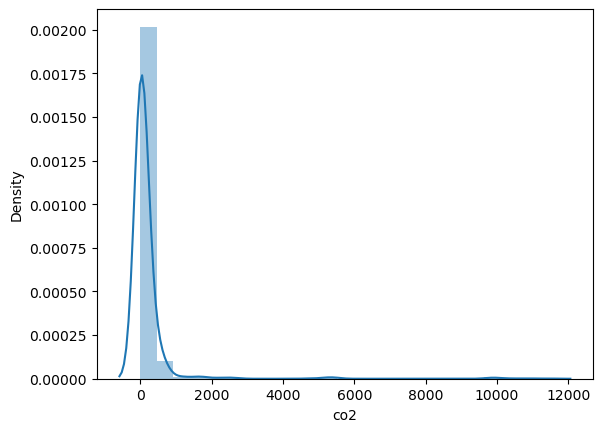

In [17]:
# Shows extreme values for the "co2" column

sns.distplot(df_co2_new['co2'], bins=25)

#### We already learned in the previous script that there are some high values related to the  United States and China. For now, the model will be trained on the complete dataset. If the results turn out to be poor, outliers can be removed.

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\3895631049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_new['primary_energy_consumption'], bins=25)


<AxesSubplot:xlabel='primary_energy_consumption', ylabel='Density'>

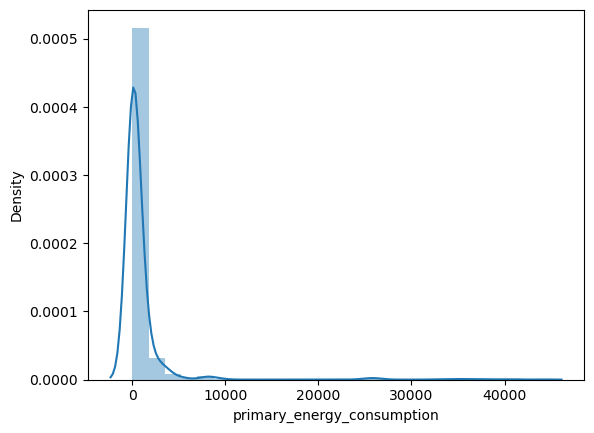

In [18]:
# Shows extreme values for the "primary_energy_consumption" column

sns.distplot(df_co2_new['primary_energy_consumption'], bins=25)

#### The same goes for primary energy consumption. We will see if the outliers should be removed later.

# 4. Defining the Hypothesis 

#### During my previous analysis in script 6.2, I found a high correlation between "primary_energy_consumption" and "co2". When analyzing the two variables in a scatterplot it appeared to me they had a linear relationship which led me to the following hypothesis:
The average energy consumption of countries with "high" CO2 emissions will be higher than the average energy consumption of countries with "low" CO2 emissions.

#### To make it more comprehensible for the regression analysis:


The higher the primary energy consumption, the higher the CO2 emissions.

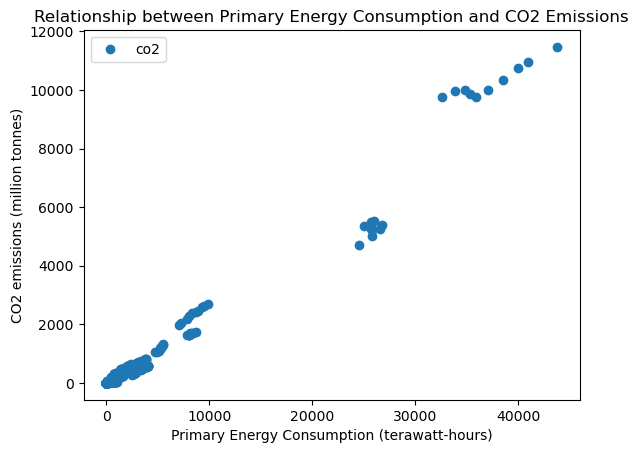

In [19]:
# Create a scatterplot between the two variables

df_co2_new.plot(x = 'primary_energy_consumption', y = 'co2',style='o')
plt.title('Relationship between Primary Energy Consumption and CO2 Emissions')  
plt.xlabel('Primary Energy Consumption (terawatt-hours)')  
plt.ylabel('CO2 emissions (million tonnes)')  
plt.show()

#### Besides a few outliers the relationship between the two variables seems pretty linear.

# 5. Regression Analysis

## 5.1 Reshaping variables into NumPy arrays

#### In order to use the scikit learn functions, we need to reshape our two variables into NumPy arrays. Our independent variable (X) will be primary_energy_consumption, while co2 will be our dependent variable (y).

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_co2_new['primary_energy_consumption'].values.reshape (-1, 1)
y = df_co2_new['co2'].values.reshape (-1, 1)

In [21]:
# Check the output for X

X

array([[43.26 ],
       [36.489],
       [33.502],
       ...,
       [45.936],
       [47.502],
       [49.427]])

In [22]:
# Check the output for y

y

array([[10.035],
       [ 9.251],
       [ 9.17 ],
       ...,
       [ 9.596],
       [11.795],
       [11.115]])

## 5.2 Splitting Data

#### For creating our model we need to split our data into a training set (used to train the model) and a test set (to test the model). The test data will contain only 30% of our observations.

In [23]:
# Split data into a train set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5.3 Creating and fitting the regression object

#### As a first step, I will create a regression object using the LinearRegression function.

In [24]:
# Create a regression object

regression = LinearRegression()

#### The next step is to fill this object with the train set, to train our model.

In [25]:
# Fill the regression object

regression.fit(X_train, y_train)

LinearRegression()

## 5.4 Testing predictions

#### After the model is trained, it's time to predict our dependant variable (y) values, based on our independent variable (x) values.  

In [26]:
# Create predictions based on X values from test set

y_predicted = regression.predict(X_test)

#### Let's create a plot that shows the regression line from the model on the test set.


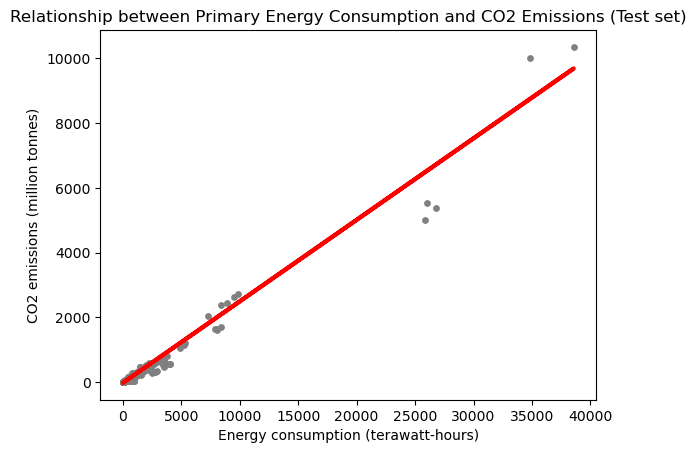

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between Primary Energy Consumption and CO2 Emissions (Test set)')
plot_test.xlabel('Energy consumption (terawatt-hours)')
plot_test.ylabel('CO2 emissions (million tonnes)')
plot_test.show()

#### The red line represents y values predicted, based on x values. You can see that there are still some datapoints a little far from our predictions, because of some high CO2 values. It is worth a try to see if removing those datapoints will improve the model.

## 5.5 Summary Statistics

#### To check how well the model performed (in addition to the chart above) we can look at some summary statistics.

In [28]:
# Create objects for mean squared error and r squared value.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
# Print the content

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R squared score: ', r2)

Slope: [[0.25176451]]
Mean squared error:  18743.104776638076
R squared score:  0.9690295445720375


* The slope tells us how much the y values change when the x values change. A positive slope like in our case indicates that the two variables are in a positive relationship: as x increases, y increases as well.


* The mean squared error represents how accurate our predictions are. It's the average of the squared distance between the predicted values and the actual values. In our case it is a little high. In a new test after removing outliers we might be able to improve it.

* The R squared score represents how strong the relationship is. We already investigated the correlation between these two variables and we discovered that the relationship is strong.

## 5.6 Comparing actual values and predicted values

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

df_co2_new_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_co2_new_comparison.head(30)

,Actual,Predicted
0,260.111,246.109878
1,10.635,-9.044391
2,5.535,-11.406949
3,0.007,-22.238614
4,629.366,802.477475
5,446.204,455.215159
6,0.531,-21.768569
7,64.160,77.157512
8,1.033,-20.553050
9,0.125,-22.078995


####  Looking at the results you can tell that something is definitely off. Whenever an actual value is very low (like under 10) the predicted value is negative. However, when it comes to values around 70, the predictions are more accurate. This means that the extreme values definitely skewed the results and there is a need to improve our regression analysis.

# 6. Improving the regression

## 6.1 Removing Outliers

#### We already know that there are some extreme values in our two variables. Therefore, I'm going to restrict the dataframe.

In [31]:
# Remove extreme values

df_co2_new_filter = df_co2_new[df_co2_new['co2'] <= 2000]

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\985576367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_new_filter['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

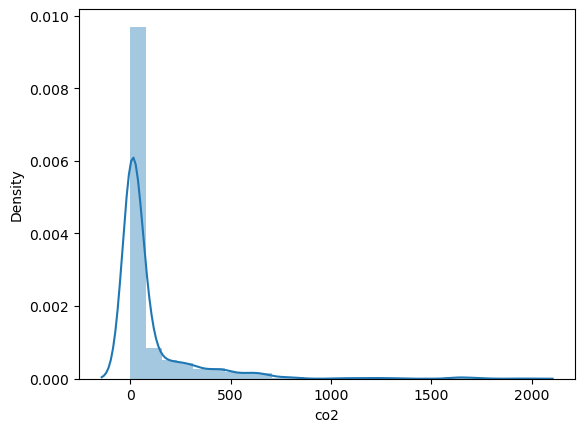

In [32]:
# Check the distribution again

sns.distplot(df_co2_new_filter['co2'], bins=25)

#### This looks better. Let's check the size of our new dataframe.

In [33]:
# Check the size of the dataframe

df_co2_new_filter.shape

(1803, 44)

#### This dataframe has 29 observations less and it looks like we successfully removed our outliers. The next step is to check the new distribution of the primary energy consumption variable as well.

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\774227262.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_new_filter['primary_energy_consumption'], bins=25)


<AxesSubplot:xlabel='primary_energy_consumption', ylabel='Density'>

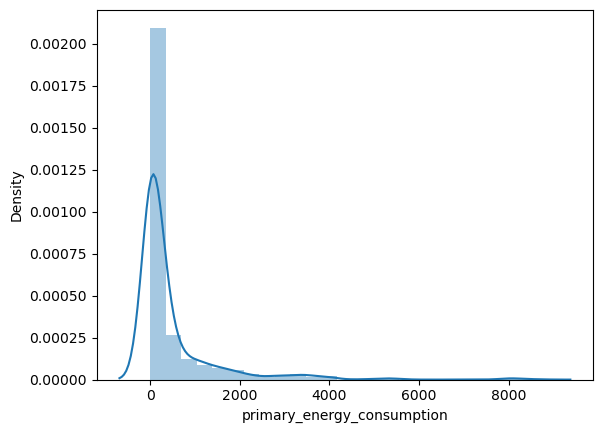

In [34]:
# Check the distribution again

sns.distplot(df_co2_new_filter['primary_energy_consumption'], bins=25)

#### The distribution changed here as well and looks better now. Next I want to see what the scatterplot looks like after removing the outliers.

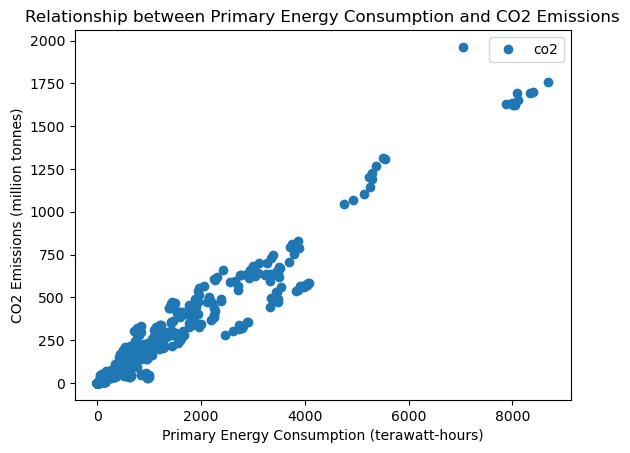

In [35]:
# Create a new scatterplot after removing outliers

df_co2_new_filter.plot(x = 'primary_energy_consumption', y = 'co2',style='o')
plt.title('Relationship between Primary Energy Consumption and CO2 Emissions')  
plt.xlabel('Primary Energy Consumption (terawatt-hours)')  
plt.ylabel('CO2 Emissions (million tonnes)')  
plt.show()

#### This chart, despite having only 29 datapoints less, gives us a better understanding of the relationship between the two variables. Now it's time for a new regression.

## 6.2  Reshaping variables into NumPy arrays

#### Let's continue with the same procedure as before starting with reshaping our variables.

In [36]:
# Turn the variables into arrays

X_2 = df_co2_new_filter['primary_energy_consumption'].values.reshape (-1, 1)
y_2 = df_co2_new_filter['co2'].values.reshape (-1, 1)

In [37]:
# Test the output

X_2

array([[43.26 ],
       [36.489],
       [33.502],
       ...,
       [45.936],
       [47.502],
       [49.427]])

In [38]:
# Test the output

y_2

array([[10.035],
       [ 9.251],
       [ 9.17 ],
       ...,
       [ 9.596],
       [11.795],
       [11.115]])

## 6.3 Splitting Data

In [39]:
# Split data into a train set and a test set

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

## 6.4 Creating and fitting the regression object

In [40]:
# Create a regression object

regression_2 = LinearRegression()

#### Next let's fill our object with the new train data.

In [41]:
# Fill the regression object

regression_2.fit(X_train_2, y_train_2)

LinearRegression()

## 6.5 Testing Predictions

In [42]:
# Create predictions based on X values from test set

y_predicted_2 = regression_2.predict(X_test_2)

#### Let's create the new scatterplot with the new regression line.

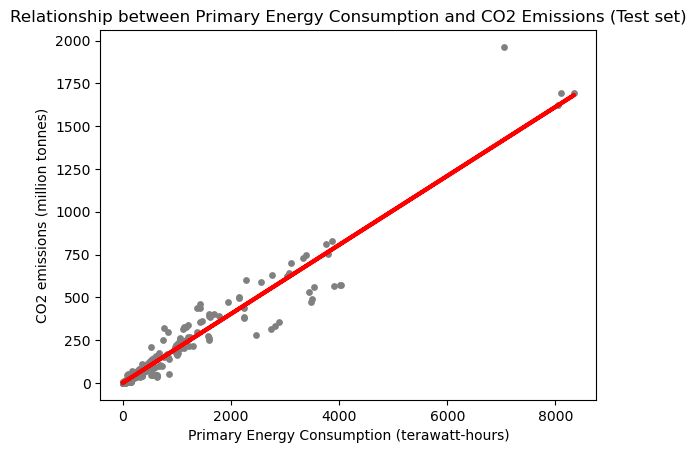

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='grey', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Relationship between Primary Energy Consumption and CO2 Emissions (Test set)')
plot_test_2.xlabel('Primary Energy Consumption (terawatt-hours)')
plot_test_2.ylabel('CO2 emissions (million tonnes)')
plot_test_2.show()

#### When looking at the plot, you can see that the accuracy of our new model should be higher. All datapoints except for one at the very top are relatively close to the regression line. Let's take a look at the summary statistics to back this up.

## 6.6 Summary Statistics

In [44]:
# Create objects for mean squared error and r squared value.

rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [45]:
# Print the content

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R squared score: ', r2_2)

Slope: [[0.20142454]]
Mean squared error:  2270.3749329637476
R squared score:  0.9442338356628369


* The slope decreased a little bit, but still indicates a positive relationship.
* The mean squared error decreased drastically, so we can say our new model is definitely more accurate than the previous.
* The R squared value is a little lower than before, but still indicates a strong relationship between the two variables.

## 6.7 Comparing actual values and predicted values

In [46]:
df_co2_new_comparison_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
df_co2_new_comparison_2.head(30)

,Actual,Predicted
0,0.621,1.088410
1,568.223,788.093146
2,251.453,148.972088
3,40.328,40.530960
4,4.566,4.554121
5,0.623,1.370203
6,201.372,216.980263
7,0.725,1.420962
8,1.349,4.182492
9,151.525,152.049452


#### Looking at the results you can see that our predictions are much more accurate now and all the negative values are gone.There is still some margin of error, but is a huge improvement compared to our first regression. Some predictions are actually very close to the actual value (see for example index 3, 4 or 9).

# 7. Conclusions

In conclusion, in my opinion this model is a good fit that can back up my research hypothesis:

The higher the primary energy consumption, the higher the CO2 emissions.

According to the data, this is partially true, at least in certain conditions.
While this model can be applied to the majority of data included in the dataframe, it isn't a good fit when it comes to extreme values.
Based on the results, primary energy consumption may not be the only variable influencing CO2 emissions, but it surely plays some part in it.

I don't see many potential biases in here. One problem though is that the dataset after all the cleaning steps has less than 2.000 observations left and for a regression ananlysis it is best to have at least 5.000 observations. Unfortunately, the dataset had a lot of missing values which needed to be removed before the analysis. 
Another potential bias is the removal of the extreme values since we can't just pretend they don't exist. They were removed for the sake of the analysis but I should investigate further why these values are so different from the values registered in the majority of all other countries.

# 8. Regression Analysis for the full dataframe (all years included)

#### Back in script 6.1 after the cleaning steps I created two different dataframes for CO2 emissions: a shorter one that includes only the last 10 years (df_co2_recent) and another one that includes all the years reported (df_co2). In the first part of this script I did the regression analysis for the shorter dataframe (last 10 years), but since this dataframe contains less than 5.000 observations which is not ideal for predictive analysis, I'm also going to perform the regression analysis on the full dataframe (all years included) since this dataframe has more observations.

## 8.1 Importing the full Dataframe (all years included)

In [47]:
# Import the dataframe which includes oberservations for all years reported

df_co2_full = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean.pkl'))

In [48]:
# Check the output

df_co2_full.head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1855,AFG,3844769.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1856,AFG,3863976.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1857,AFG,3883276.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1858,AFG,3902671.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1859,AFG,3922160.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### This dataframe contains all the years reported.

In [49]:
# Check the size of the dataframe

df_co2_full.shape

(46523, 41)

#### This dataframe has a lot more observations. Let's see how many are left after the cleaning steps.

## 8.2 Data Cleaning

### 8.2.1 Missing values and "0" values

In [50]:
# Check for missing values

df_co2_full.isnull().sum()

country                                    0
year                                       0
iso_code                                   0
population                              7949
gdp                                    31972
cement_co2                             21549
cement_co2_per_capita                  23809
co2                                    15174
co2_growth_abs                         17579
co2_growth_prct                        21491
co2_per_capita                         19608
co2_per_gdp                            30232
coal_co2                               21454
coal_co2_per_capita                    22102
cumulative_cement_co2                  21650
cumulative_co2                         17167
cumulative_coal_co2                    21555
cumulative_flaring_co2                 21749
cumulative_gas_co2                     21681
cumulative_oil_co2                     21582
energy_per_capita                      36536
energy_per_gdp                         39364
flaring_co

#### This dataframe has lots of missing values! The misssing values for our variables of interest "co2" and "primary_energy_consumption" need to be removed before our analysis.

In [51]:
# Create a new dataframe that doesn't contain missing values in the variable of interest: "primary_energy_consumption"

df_co2_full_new = df_co2_full[df_co2_full['primary_energy_consumption'].isnull() == False]

In [52]:
# Check the size of the new dataframe

df_co2_full_new.shape

(10085, 41)

#### The number of observations reduced drastically. Let's see how many missing values we have left in the "co2" column.

In [53]:
# Check for missing values

df_co2_full_new.isnull().sum()

country                                   0
year                                      0
iso_code                                  0
population                               98
gdp                                    2926
cement_co2                              420
cement_co2_per_capita                   441
co2                                     263
co2_growth_abs                          271
co2_growth_prct                         243
co2_per_capita                          284
co2_per_gdp                            2396
coal_co2                                274
coal_co2_per_capita                     295
cumulative_cement_co2                   420
cumulative_co2                          263
cumulative_coal_co2                     274
cumulative_flaring_co2                  274
cumulative_gas_co2                      274
cumulative_oil_co2                      274
energy_per_capita                        98
energy_per_gdp                         2926
flaring_co2                     

#### There are only 263 missing values left in the "co2" column which also need to be removed.

In [54]:
# Create a new dataframe that doesn't contain missing values in the variable of interest: "co2"

df_co2_full_new = df_co2_full_new[df_co2_full_new['co2'].isnull() == False]

In [55]:
# Check the size of the new dataframe

df_co2_full_new.shape

(9822, 41)

#### The missing values have been removed. There are 263 less observations now.

In [56]:
# Check for missing values to make sure we have none left for our variables of interest

df_co2_full_new.isnull().sum()

country                                   0
year                                      0
iso_code                                  0
population                               78
gdp                                    2712
cement_co2                              157
cement_co2_per_capita                   178
co2                                       0
co2_growth_abs                            8
co2_growth_prct                          20
co2_per_capita                           21
co2_per_gdp                            2133
coal_co2                                 11
coal_co2_per_capita                      32
cumulative_cement_co2                   157
cumulative_co2                            0
cumulative_coal_co2                      11
cumulative_flaring_co2                   11
cumulative_gas_co2                       11
cumulative_oil_co2                       11
energy_per_capita                        78
energy_per_gdp                         2712
flaring_co2                     

#### Looks good, no missing values left for "co2" and "primary_energy_consumption". Now just the "0" values need to be removed.

In [57]:
# Remove 0 values

df_co2_full_new = df_co2_full_new[df_co2_full_new['co2'] >= 0.00001]

In [58]:
# Remove 0 values

df_co2_full_new = df_co2_full_new[df_co2_full_new['primary_energy_consumption'] >= 0.00001]

In [59]:
# Check the size of the dataframe after removing the 0 values

df_co2_full_new.shape

(9768, 41)

#### Great! After all the cleaning steps we have 9735 observations left which is clearly above 5.000 and therefore suitable for the regression analysis.

### 8.2.2 Checking extreme values

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\2791343758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_full_new['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

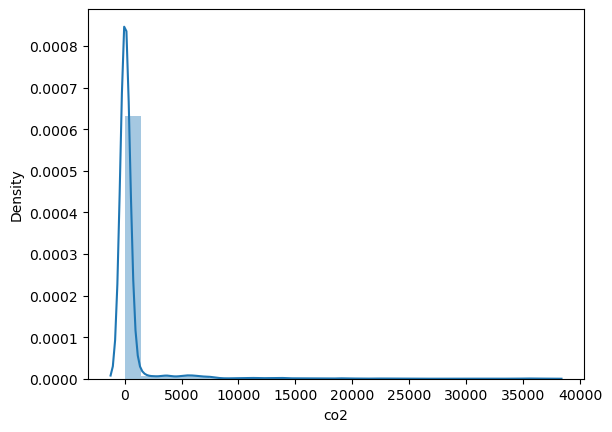

In [60]:
# Shows extreme values for the "co2" column

sns.distplot(df_co2_full_new['co2'], bins=25)

#### We already know that there are some high values present. For now, the model will be trained on the complete dataset. If the results turn out to be poor, outliers can be removed.

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\4094270843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_full_new['primary_energy_consumption'], bins=25)


<AxesSubplot:xlabel='primary_energy_consumption', ylabel='Density'>

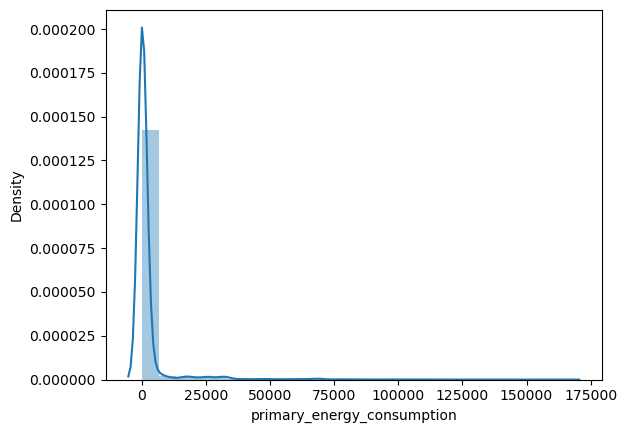

In [61]:
# Shows extreme values for the "primary_energy_consumption" column

sns.distplot(df_co2_full_new['primary_energy_consumption'], bins=25)

#### The same is the case for primary energy consumption. We will see if the outliers should be removed later.

## 8.3 Scatterplot for the variables of interest

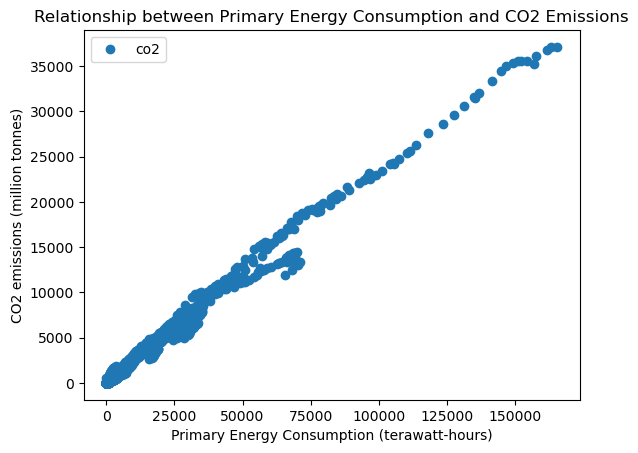

In [62]:
# Create a scatterplot between the two variables of interest primary energy consumption and co2

df_co2_full_new.plot(x = 'primary_energy_consumption', y = 'co2',style='o')
plt.title('Relationship between Primary Energy Consumption and CO2 Emissions')  
plt.xlabel('Primary Energy Consumption (terawatt-hours)')  
plt.ylabel('CO2 emissions (million tonnes)')  
plt.show()

#### The relationship between the two variables appears pretty linear.

## 8.4 Regression Analysis

### 8.4.1 Reshaping variables into NumPy arrays

In [63]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_co2_full_new['primary_energy_consumption'].values.reshape (-1, 1)
y = df_co2_full_new['co2'].values.reshape (-1, 1)

In [64]:
# Check the output for X

X

array([[ 7.791],
       [ 8.777],
       [ 9.348],
       ...,
       [45.936],
       [47.502],
       [49.427]])

In [65]:
# Check the output for y

y

array([[ 1.756],
       [ 1.978],
       [ 2.095],
       ...,
       [ 9.596],
       [11.795],
       [11.115]])

### 8.4.2 Splitting Data

In [66]:
# Split data into a train set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8.4.3 Creating and fitting the regression object

In [67]:
# Create a regression object

regression = LinearRegression()

In [68]:
# Fill the regression object

regression.fit(X_train, y_train)

LinearRegression()

### 8.4.4 Testing Predictions

In [69]:
# Create predictions based on X values from test set

y_predicted = regression.predict(X_test)

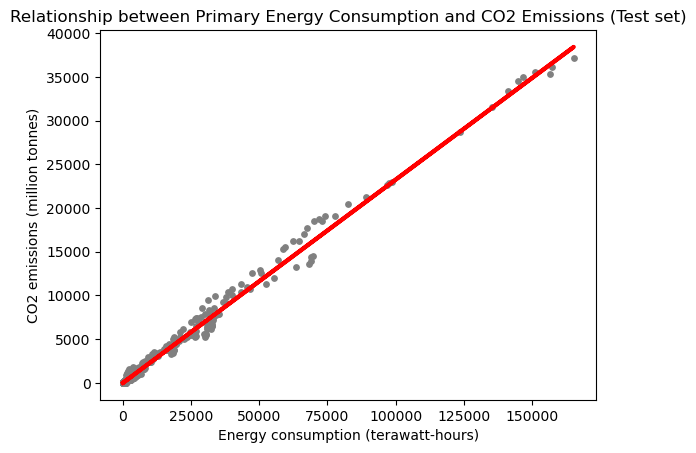

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='grey', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between Primary Energy Consumption and CO2 Emissions (Test set)')
plot_test.xlabel('Energy consumption (terawatt-hours)')
plot_test.ylabel('CO2 emissions (million tonnes)')
plot_test.show()

#### This looks good! All data points are pretty close to the regression line. Next let's take a look at the summary statistics.

### 8.4.5 Summary Statistics

In [71]:
# Create objects for mean squared error and r squared value.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [72]:
# Print the content

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R squared score: ', r2)

Slope: [[0.23236782]]
Mean squared error:  49224.656581260235
R squared score:  0.9934475781975739


* The slope indicates a positive relationship between the two variables and takes a similar value than for the short dataframe (10 year range).
* The mean squared error is kind of high, but lower than for the short dataframe. In a new test after removing outliers we might be able to improve it.
* The R squared value indicates a strong relationship between the two variables.

### 8.4.6 Comparing actual values and predicted values

In [73]:
# Create a dataframe comparing the actual and predicted values of y.

df_co2_full_new_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_co2_full_new_comparison.head(30)

,Actual,Predicted
0,3.099,3.676610
1,168.260,254.522089
2,4.299,4.315854
3,37.596,72.958935
4,6.609,6.453870
5,2257.739,1615.087971
6,0.623,0.753888
7,1.876,0.662799
8,3.604,4.138325
9,56.637,81.467548


#### Overall the predictions are pretty accurate (for example index 4, 6 or 26), even though there are still some predicted values that are pretty far off from their actual values (for example index 16, 19 or 24) . It might be worth it to check if removing outliers can improve the model.

# 9. Improving the Regression for the full dataframe (all years included)

## 9.1 Removing Outliers

#### We already know that there are some extreme values in our two variables. Therefore, I'm going to restrict the dataframe.

In [74]:
# Remove extreme values

df_co2_full_new_filter = df_co2_full_new[df_co2_full_new['co2'] <= 8000]

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\801230715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_full_new_filter['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

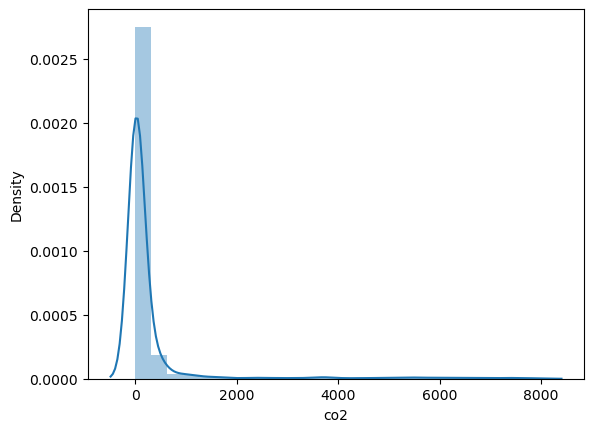

In [75]:
# Check the distribution again

sns.distplot(df_co2_full_new_filter['co2'], bins=25)

#### This looks a little better.

In [76]:
# Check the size of the dataframe

df_co2_full_new_filter.shape

(9596, 41)

#### In the new dataframe we have 172 observations less. 

C:\Users\osoty\AppData\Local\Temp\ipykernel_5544\746433518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_new_filter['primary_energy_consumption'], bins=25)


<AxesSubplot:xlabel='primary_energy_consumption', ylabel='Density'>

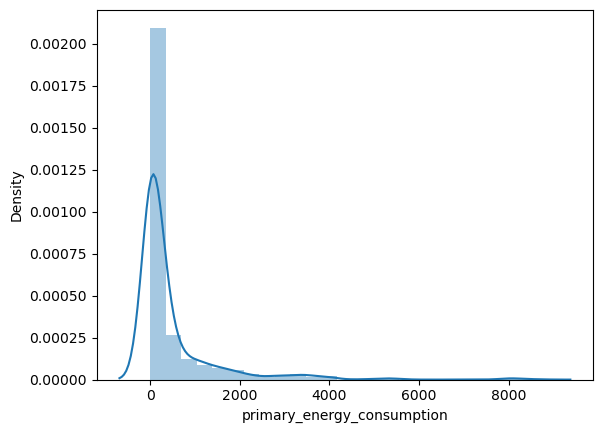

In [77]:
# Check the distribution again for primary energy consumption

sns.distplot(df_co2_new_filter['primary_energy_consumption'], bins=25)

#### This also looks better, more bins are visible now.

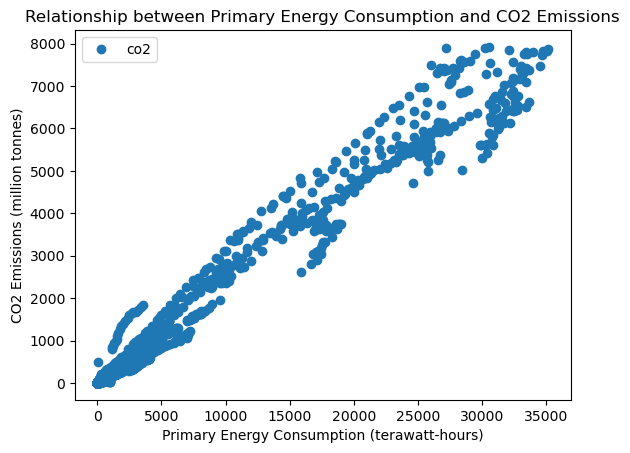

In [78]:
# Create a new scatterplot after removing outliers

df_co2_full_new_filter.plot(x = 'primary_energy_consumption', y = 'co2',style='o')
plt.title('Relationship between Primary Energy Consumption and CO2 Emissions')  
plt.xlabel('Primary Energy Consumption (terawatt-hours)')  
plt.ylabel('CO2 Emissions (million tonnes)')  
plt.show()

#### Most datapoints are clustered in an upward line.

## 9.2 Reshaping variables into NumPy arrays

In [79]:
# Turn the variables into arrays

X_2 = df_co2_full_new_filter['primary_energy_consumption'].values.reshape (-1, 1)
y_2 = df_co2_full_new_filter['co2'].values.reshape (-1, 1)

In [80]:
# Test the output

X_2

array([[ 7.791],
       [ 8.777],
       [ 9.348],
       ...,
       [45.936],
       [47.502],
       [49.427]])

In [81]:
# Test the output

y_2

array([[ 1.756],
       [ 1.978],
       [ 2.095],
       ...,
       [ 9.596],
       [11.795],
       [11.115]])

## 9.3 Splitting Data

In [82]:
# Split data into a train set and a test set

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

## 9.4 Creating and fitting the regression object

In [83]:
# Create a regression object

regression_2 = LinearRegression()

In [84]:
# Fill the regression object

regression_2.fit(X_train_2, y_train_2)

LinearRegression()

## 9.5 Testing Predictions

In [85]:
# Create predictions based on X values from test set

y_predicted_2 = regression_2.predict(X_test_2)

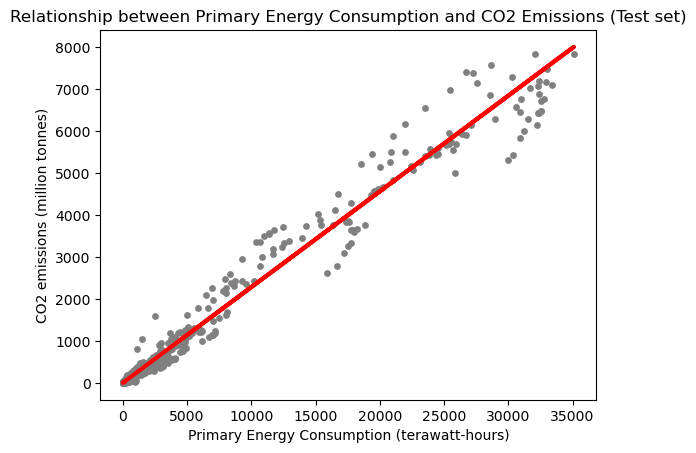

In [86]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='grey', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Relationship between Primary Energy Consumption and CO2 Emissions (Test set)')
plot_test_2.xlabel('Primary Energy Consumption (terawatt-hours)')
plot_test_2.ylabel('CO2 emissions (million tonnes)')
plot_test_2.show()

#### Most values are close to the regression line, even though they are a little further away from the line at the top of the plot. Based on the plot alone it is hard to tell if removing the outliers improved the model. Let's look at the summary statistics to get a better idea.

## 9.6 Summary Statistics

In [87]:
# Create objects for mean squared error and r squared value.

rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [88]:
# Print the content

print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R squared score: ', r2_2)

Slope: [[0.22802103]]
Mean squared error:  20292.633129882877
R squared score:  0.9802706296978687


* The slope decreased a little bit, but still indicates a positve relationship
* The mean squared error decreased drastically (to about half of the previous value), so we can say our new model is definitely more accurate than the previous.
* The R squared value is a little lower than before, but still indicates a strong relationship between the two variables.

## 9.7 Comparing actual values and predicted values

In [89]:
df_co2_full_new_comparison_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
df_co2_full_new_comparison_2.head(30)

,Actual,Predicted
0,10.953,15.105200
1,0.344,3.472479
2,1.903,5.927581
3,49.882,67.376967
4,7.798,10.218481
5,440.436,504.316556
6,0.846,4.057809
7,1.517,4.105693
8,50.124,60.658328
9,3.436,15.918779


#### Overall the predictions are pretty accurate (for example index 0, 10 or 11), but as before there are still some predicted values that are pretty far off from their actual values (for example index 9, 21 or 24) . Based on these observations removing the outliers didn't really lead to a huge improvement of the model. 

# 10. Conclusions based on Regression Analysis for the full dataframe

#### After the regression analysis for the full dataframe I come to the same conclusions as when analyzing the shorter dataframe. Overall, the model is a good fit to back up my research hypothesis : 

The higher the primary energy consumption, the higher the CO2 emissions.

#### Most datapoints were pretty close to the regression line, but when comparing the actual values with the predicted values, it shows that there are still several predicted values that are far off from the actual values.

#### Based on my regression analysis I conclude that primary energy consumption definitely plays a part in influencing CO2 emssions, but it might not be the only variable that plays a role. 
